In [2]:
# import libraries
import pandas as pd
import cupy as cp
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [3]:
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv"
data = pd.read_csv(url_data)
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
pd.isnull(data)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


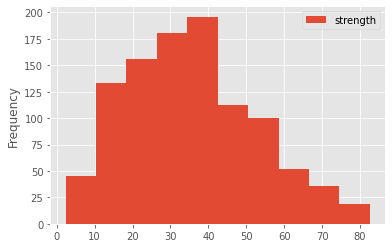

In [17]:
dataStr = data.drop(['cement',	'slag',	'ash',	'water',	'superplastic',	'coarseagg',	'fineagg',	'age'],axis = 1)
dataStr.plot.hist()

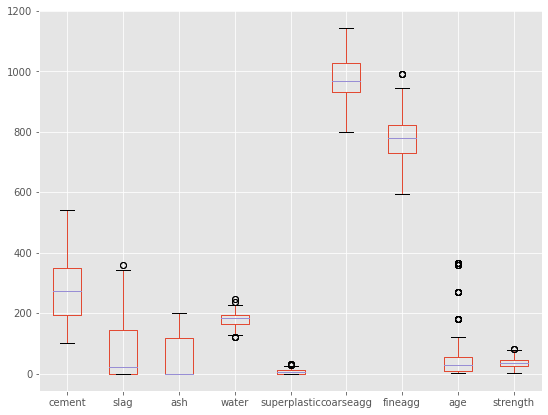

In [19]:
pd.plotting.boxplot(data, figsize=(9,7))

In [20]:
data.dropna(inplace = True)
include =['object', 'float', 'int']
desc = data.describe(include = include)
desc

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


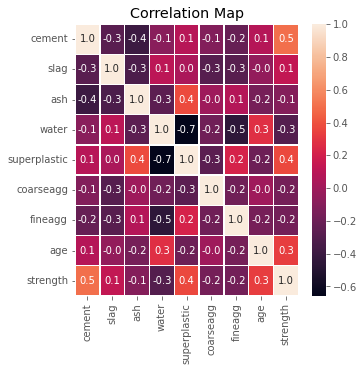

In [22]:
f,ax=plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [23]:
print("Covariance diantara age dan strength mean: ",data.age.cov(data.strength))
print("Covariance diantara strength dan cement mean: ",data.strength.cov(data.cement))

Covariance diantara age dan strength mean:  347.05975751743136
Covariance diantara strength dan cement mean:  869.1430218800419


In [32]:
pearson = data["cement"].corr(data["age"])
spearman = data["cement"].corr(data["age"],method ="spearman")
print("Pearson Correlation = ", pearson) 
print("Spearman Correlation = ", spearman)

Pearson Correlation =  0.08194602387182238
Spearman Correlation =  0.0046397704053453255


In [33]:
statistic, p_value = stats.ttest_rel(data.age, data.strength)
print('p-value adalah: ',p_value)

p-value adalah:  1.5453117192089214e-07
